# NLE Assignment 2: Distributional Semantics

In this assignment, you will be investigating the *distributional hypothesis*: **words which appear in similar contexts tend to have similar meanings**.

For assessment, you are expected to complete and submit this notebook file. When answers require code, you may import and use library functions (unless explicitly told otherwise). All of your own code should be included in the notebook rather than imported from elsewhere. Written answers should also be included in the notebook. You should insert as many extra cells as you want and change the type between code and markdown as appropriate.

In order to avoid misconduct, you should not talk about the assignment questions with your peers. If you are not sure what a question is asking you to do or have any other questions, please ask me or one of the Teaching Assistants.

Marking guidelines are provided as a separate document.

The first few cells contain code to set-up the assignment and bring in some data. In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell. Otherwise do not change the code in these cells.

In [ ]:
candidateno=231033   #this MUST be updated to your candidate number so that you get a unique data sample

In [ ]:
#set up drives for resources.  Change the path as necessary

from google.colab import drive
#mount google drive
drive.mount('/content/drive/')
import sys
sys.path.append('/content/drive/My Drive/NLENotebooks/resources/')

Mounted at /content/drive/


In [ ]:
#do not change the code in this cell
#preliminary imports

import re
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
from itertools import zip_longest

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('wordnet_ic')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet_ic as wn_ic
brown_ic = wn_ic.ic("ic-brown.dat")


from sussex_nltk.corpus_readers import ReutersCorpusReader

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package wordnet_ic to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet_ic.zip.
Sussex NLTK root directory is /content/drive/My Drive/NLENotebooks/resources


We are going to be using the Reuters corpus of financial documents for this assignment.  When you run the following cell you should see that it contains 1,113,359 sentences.

In [ ]:
#do not change the code in this cell
rcr = ReutersCorpusReader().finance()
rcr.enumerate_sents()

1113359

The following cell will take 2-5 minutes to run.  It will generate a unique-to-you sample of 200,000 sentences.  These sentences are tokenised and normalised for case and number for you.

In [ ]:
#do not change the code in this cell
def normalise(tokenlist):
    tokenlist=[token.lower() for token in tokenlist]
    tokenlist=["NUM" if token.isdigit() else token for token in tokenlist]
    tokenlist=["Nth" if (token.endswith(("nd","st","th")) and token[:-2].isdigit()) else token for token in tokenlist]
    tokenlist=["NUM" if re.search("^[+-]?[0-9]+\.[0-9]",token) else token for token in tokenlist]
    return tokenlist

random.seed(candidateno)  
samplesize=2000
iterations =100
sentences=[]
for i in range(0,iterations):
    sentences+=[normalise(sent) for sent in rcr.sample_sents(samplesize=samplesize)]
    print("Completed {}%".format(i))
print("Completed 100%")


Completed 0%
Completed 1%
Completed 2%
Completed 3%
Completed 4%
Completed 5%
Completed 6%
Completed 7%
Completed 8%
Completed 9%
Completed 10%
Completed 11%
Completed 12%
Completed 13%
Completed 14%
Completed 15%
Completed 16%
Completed 17%
Completed 18%
Completed 19%
Completed 20%
Completed 21%
Completed 22%
Completed 23%
Completed 24%
Completed 25%
Completed 26%
Completed 27%
Completed 28%
Completed 29%
Completed 30%
Completed 31%
Completed 32%
Completed 33%
Completed 34%
Completed 35%
Completed 36%
Completed 37%
Completed 38%
Completed 39%
Completed 40%
Completed 41%
Completed 42%
Completed 43%
Completed 44%
Completed 45%
Completed 46%
Completed 47%
Completed 48%
Completed 49%
Completed 50%
Completed 51%
Completed 52%
Completed 53%
Completed 54%
Completed 55%
Completed 56%
Completed 57%
Completed 58%
Completed 59%
Completed 60%
Completed 61%
Completed 62%
Completed 63%
Completed 64%
Completed 65%
Completed 66%
Completed 67%
Completed 68%
Completed 69%
Completed 70%
Completed 71%
Co

`generate_features()` will used in the first part of the assignment.

In [ ]:
#do not change the code in this cell
def generate_features(sentences,window=1):
    mydict={}
    for sentence in sentences:
        for i,token in enumerate(sentence):
            current=mydict.get(token,{})
            features=sentence[max(0,i-window):i]+sentence[i+1:i+window+1]
            for feature in features:
                current[feature]=current.get(feature,0)+1
            mydict[token]=current
    return mydict

1) Run `generate_features(sentences[:5])`. With reference to the code and the specific examples, explain how the output was generated [10 marks]

In [ ]:
generate_features(sentences[:5])

{'$': {'NUM': 1, 'for': 1},
 "''": {',': 1, '.': 1, 'he': 1},
 ',': {"''": 1,
  'content': 1,
  'energy': 2,
  'exploit': 1,
  'household': 1,
  'if': 1,
  'move': 1,
  'organized': 1,
  'then': 1,
  'utilities': 1,
  'workers': 1},
 '.': {"''": 1, 'another': 1, 'said': 1},
 'NUM': {'$': 1, 'a': 1, 'fy': 2, 'june': 3, 'may': 2, 'q1': 3},
 'a': {'NUM': 1, 'day': 1},
 'about': {'misunderstandings': 1, 'the': 1},
 'american': {'of': 1, 'workers': 1},
 'and': {'day': 1, 'fuels': 1, 'then': 1, 'utilities': 1},
 'another': {'.': 1, 'to': 1},
 'away': {'the': 1, 'throw': 1},
 'content': {',': 1, 'the': 1},
 'countries': {'in': 1, 'like': 1},
 'day': {'a': 1, 'and': 1},
 'domestic': {'gross': 1, 'product': 1},
 'energy': {',': 2},
 'exploit': {',': 1, 'workers': 1},
 'for': {'$': 1, 'mexico': 1},
 'from': {'move': 1, 'one': 1},
 'fuels': {'and': 1},
 'fy': {'NUM': 2},
 'get': {'organized': 1, 'to': 1},
 'gross': {'domestic': 1},
 'he': {"''": 1, 'said': 1},
 'household': {',': 1},
 'if': {',':

# part1 ：


> generate_features(sentences[:5]) , first get the the first 5 sentences from the sentences. then use the generate_features funtion.


>the function named generate_features ,it calculate the number of the times the words co-occur together , input the sentences we generate before. **window** means the distance from the word or sentence. The Ouput is the dictionary set which we create at the beginning of funtion, named **mydict**.It stores every data we want to ouput.


> First loop iterate all the sentence in sentences to get the internal list.

> Second loop iterate the i and tokens in the enumerate() function. Get the curret sentce in mydict through token.Max() funtion returns the bigger number between 0 and 1-window ,then get the sentence which locate from the number to i,sentence from the location (i+1: to i+window+1)  ,combined them to features and assigned to features.


> Third loop traversal the feature in features, calculate the times which feature occurs. According to the token, put it into mydict.At last, return mydict.


'workers': {',': 1, 'american': 1, 'exploit': 1, 'in': 1}

> this is one set of the output, we can see directly the format is key-value. Key is the word of the features are generated. Value is a dictionary, it can contains one key-value or more, in this example, it contains three key-values. In the feature,the key for it is the word of feature and the value means the times it occurs.




2) Write code and **find** the 1000 most frequently occurring words that
* are in your sample; AND
* have at least one noun sense according to WordNet [10 marks]

In [ ]:
from nltk.probability import FreqDist
import operator

def most_frequent(freqdist,k=1000):
    return sorted(freqdist.items(),key=operator.itemgetter(1),reverse=True)[:k]

def get_noun(sentences):
  returnlist=[]
  for sentence in sentences:
    if len(wn.synsets(sentence,wn.NOUN))>0:
      returnlist.append(sentence)
      
  return returnlist


wordlist=[]
for sentence in sentences:
  wordlist+=sentence

top_word = most_frequent(FreqDist(get_noun(wordlist)))
top_word

[('in', 56284),
 ('a', 49285),
 ('percent', 18015),
 ('it', 15372),
 ('be', 14511),
 ('pct', 14328),
 ('at', 14253),
 ('was', 13302),
 ('will', 11067),
 ('he', 10956),
 ('as', 10910),
 ('bank', 9112),
 ('million', 8843),
 ('year', 8696),
 ('have', 8692),
 ('are', 8636),
 ('has', 8599),
 ('may', 8421),
 ('government', 8312),
 ('its', 8292),
 ('an', 8087),
 ('billion', 7271),
 ('uk', 5882),
 ('tax', 5681),
 ('rate', 5544),
 ('trade', 5531),
 ('budget', 5029),
 ('more', 4817),
 ('growth', 4762),
 ('last', 4616),
 ('u.s.', 4496),
 ('first', 4469),
 ('central', 4241),
 ('price', 4072),
 ('june', 4011),
 ('market', 3975),
 ('over', 3917),
 ('or', 3866),
 ('newsroom', 3850),
 ('union', 3807),
 ('there', 3761),
 ('state', 3732),
 ('inflation', 3680),
 ('bonds', 3599),
 ('minister', 3519),
 ('rates', 3492),
 ('economy', 3434),
 ('no', 3429),
 ('week', 3373),
 ('one', 3362),
 ('prices', 3292),
 ('i', 3265),
 ('april', 3256),
 ('interest', 3254),
 ('can', 3185),
 ('two', 3160),
 ('deficit', 3133)

In [ ]:
wordslist=[]
for i in top_word:
  wordslist.append(i[0])

wordslist

['in',
 'a',
 'percent',
 'it',
 'be',
 'pct',
 'at',
 'was',
 'will',
 'he',
 'as',
 'bank',
 'million',
 'year',
 'have',
 'are',
 'has',
 'may',
 'government',
 'its',
 'an',
 'billion',
 'uk',
 'tax',
 'rate',
 'trade',
 'budget',
 'more',
 'growth',
 'last',
 'u.s.',
 'first',
 'central',
 'price',
 'june',
 'market',
 'over',
 'or',
 'newsroom',
 'union',
 'there',
 'state',
 'inflation',
 'bonds',
 'minister',
 'rates',
 'economy',
 'no',
 'week',
 'one',
 'prices',
 'i',
 'april',
 'interest',
 'can',
 'two',
 'deficit',
 'currency',
 'finance',
 'gdp',
 'european',
 'time',
 'wednesday',
 'years',
 'tuesday',
 'july',
 'out',
 'march',
 'official',
 'rise',
 'apr',
 'who',
 'index',
 'current',
 'total',
 'thursday',
 'sales',
 'change',
 'due',
 'issue',
 'fri',
 'month',
 'policy',
 'balance',
 'three',
 'investment',
 'mon',
 'months',
 'president',
 'public',
 'do',
 'monday',
 'wed',
 'friday',
 'international',
 'capital',
 'unemployment',
 'consumer',
 'cut',
 'down',
 

In [ ]:
#do not change the code in this cell.  It relates to Q3
wordpair=("house","garden")
concept_1=wn.synsets(wordpair[0])[0]
concept_2=wn.synsets(wordpair[1])[0]
print("Path similarity between 1st sense of {} and 1st sense of {} is {}".format(wordpair[0],wordpair[1],wn.path_similarity(concept_1,concept_2)))
print("Resnik similarity between 1st sense of {} and 1st sense of {} is {}".format(wordpair[0],wordpair[1],wn.res_similarity(concept_1,concept_2, brown_ic)))
print("Lin similarity between 1st sense of {} and 1st sense of {} is {}".format(wordpair[0],wordpair[1],wn.lin_similarity(concept_1,concept_2, brown_ic)))

Path similarity between 1st sense of house and 1st sense of garden is 0.08333333333333333
Resnik similarity between 1st sense of house and 1st sense of garden is 1.2900256809649917
Lin similarity between 1st sense of house and 1st sense of garden is 0.15380807721262396


3) Consider the code above which outputs the path similarity score, the Resnik similarity score and the Lin similarity score for a pair of concepts in WordNet.  Answer the following questions.

a) Explain what each of the numbers in the output means.

b) Write code to find the semantic similarity of a pair of words according to WordNet with a parameter to specify the measure of semantic similarity between concepts.  Explain and justify the strategy used for words which have multiple senses.

c) Choose one of the measures of semantic similarity and then for every possible pair of words identified in Q2, determine the semantic similarity of the pair according to WordNet.  Justify your choice of semantic similarity measure.

d) Identify the 10 most similar words (according to WordNet) to the most frequent word in the corpus [20 marks]


#Part3:
## a:
concept_1 return the first word in wordpair which is **house**.

concept_2 return the second word in wordpair which is **garden**.

and the following numbers means the Semantic Similarity in WordNet.

the number of Path similarity use the pathlength measure to calculate. This measure is the built-in functions from nltk. The number of Resnik similarity and the number of Lin similarity both get information content data from the Brown corpus but use different measure.


---


# b:


> semantic similarity of a pair of words according to WordNet without a parameter

Path similarity between 1st sense of house and 1st sense of garden is 0.08333333333333333
Resnik similarity between 1st sense of house and 1st sense of garden is 1.2900256809649917
Lin similarity between 1st sense of house and 1st sense of garden is 0.15380807721262396

> semantic similarity of a pair of words according to WordNet with a parameter

Path similarity between house and garden is 0.07692307692307693

Resnik similarity between house and garden is 1.2900256809649917

Lin similarity between house and garden is 0.1418434707887844



> when we use the pair of words with a parameter , it will change the output of similarity. And we can see directly that the words has mutiple senses make the similarity decreased, but has no effect on Rensik similarity way. 




---



## c:
Resnik used a taxonomy with multiple inheritance as the representational model and proposed a semantic similarity measure of terms based on the notion of information content.Lin similarity based on Resnik's similarity.They both based on LCA and Lin similarity measure could be seen as a normalized version of the Resniks method.The difference between two terms with abstract annotations could be large, so it might be misleading to produce similarity values according to Lin’s method.Relatively Lin simsilarity has higher precision than Resnik's , and relate to the similarty of Resnik has no change with a parameter , so i choose Lin similarity.

In [ ]:
def word_similarity(wordA,wordB,pos=wn.NOUN,measure="path"):
    synsetsA=wn.synsets(wordA,pos)
    synsetsB=wn.synsets(wordB,pos)
    for synsetA in synsetsA:
        for synsetB in synsetsB:
          if measure=="path":
            sim=wn.path_similarity(synsetA,synsetB)
          elif measure=="res":
            sim=wn.res_similarity(synsetA,synsetB,brown_ic)
          elif measure=="lin":
            sim=wn.lin_similarity(synsetA,synsetB,brown_ic)        
    return sim

print("Path similarity between house and garden is {}".format(word_similarity("house","garden",measure="path")))
print("Resnik similarity between house and garden is {}".format(word_similarity("house","garden",measure="res")))
print("Lin similarity between house and garden is {}".format(word_similarity("house","garden",measure="lin")))

Path similarity between house and garden is 0.07692307692307693
Resnik similarity between house and garden is 1.2900256809649917
Lin similarity between house and garden is 0.1418434707887844


In [ ]:
lin_s=[]#Lin similarity
for i in range(len(wordslist)):
  for j in range(i+1,len(wordslist)):
    lin_s.append({'wordA':wordslist[i], 'wordB':wordslist[j],'lin similarity':word_similarity(wordslist[i],wordslist[j],measure="lin")})
  print("Completed {}%".format(i/10))
print("Completed 100%")

Completed 0.0%
Completed 0.1%
Completed 0.2%
Completed 0.3%
Completed 0.4%
Completed 0.5%
Completed 0.6%
Completed 0.7%
Completed 0.8%
Completed 0.9%
Completed 1.0%
Completed 1.1%
Completed 1.2%
Completed 1.3%
Completed 1.4%
Completed 1.5%
Completed 1.6%
Completed 1.7%
Completed 1.8%
Completed 1.9%
Completed 2.0%
Completed 2.1%
Completed 2.2%
Completed 2.3%
Completed 2.4%
Completed 2.5%
Completed 2.6%
Completed 2.7%
Completed 2.8%
Completed 2.9%
Completed 3.0%
Completed 3.1%
Completed 3.2%
Completed 3.3%
Completed 3.4%
Completed 3.5%
Completed 3.6%
Completed 3.7%
Completed 3.8%
Completed 3.9%
Completed 4.0%
Completed 4.1%
Completed 4.2%
Completed 4.3%
Completed 4.4%
Completed 4.5%
Completed 4.6%
Completed 4.7%
Completed 4.8%
Completed 4.9%
Completed 5.0%
Completed 5.1%
Completed 5.2%
Completed 5.3%
Completed 5.4%
Completed 5.5%
Completed 5.6%
Completed 5.7%
Completed 5.8%
Completed 5.9%
Completed 6.0%
Completed 6.1%
Completed 6.2%
Completed 6.3%
Completed 6.4%
Completed 6.5%
Completed 

In [ ]:
#get the most frequent word in corpus
wordslist[0]

'in'

In [ ]:
from operator import itemgetter
fws=[]#frequent word similarity
for i in range(1,len(wordslist)):  
  fws.append({'word':wordslist[i], 'similarity':word_similarity(wordslist[i],"in",measure="lin")})
fws.sort(key=operator.itemgetter('similarity'), reverse=True)
fws[:10]

[{'similarity': 0.6062080080943216, 'word': 'was'},
 {'similarity': 0.5470987992065358, 'word': 'district'},
 {'similarity': 0.4804952241223572, 'word': 'de'},
 {'similarity': 0.47976166382319946, 'word': 'co'},
 {'similarity': 0.46808028443738187, 'word': 'texas'},
 {'similarity': 0.4674722589410324, 'word': 'california'},
 {'similarity': 0.4674722589410324, 'word': 'ca'},
 {'similarity': 0.46063236307418604, 'word': 'u.s.'},
 {'similarity': 0.4277363599798745, 'word': 'country'},
 {'similarity': 0.4277363599798745, 'word': 'countries'}]

4)a) Write code to construct distributional vector representations of words in the corpus with a parameter to specify context size.  Explain how you calculate the value of association between each word and each context feature.

b) Use your code to construct representations of the 1000 words identified in Q2 with a window size of 1 

c) Use your representations to find the 10 words which are distributionally most similar to the most frequent word in the corpus. [15 marks]

## Part4:
**sentences** is we generate before Task1. In sentences we have about 200,000 sentences.

**wordlist** is the list which contains all words from sentences.

**wordtotal** use Feqdist()method to wordlist. It is a dictionary and its output format likes 'throw': 17.

**a** has stored all the features generated with sentences. e.g:{'throw': {'a': 1,'away': 1,'out': 2, 'owners': 1,'restrictions': 1,'still': 1,'to': 1,'up': 1}.

**feattotals** contains a dictionaty, the key of feattotals is the word in a and value means the number of features of word. e.g:{'throw':6} 

---
we use the concet of Pointwise Mutual information (PMI).

First convert_to_ppmi function use the formula of PPMI and the number of features .

\begin{eqnarray*}
\mbox{PPMI}(word,feat)=
\begin{cases}PMI(word,feat),& \mbox{if PMI}(word,feat)>0\\
=0,& \mbox{otherwise}
\end{cases}
\end{eqnarray*}

similarity() function calculate the similairty of two words by using cosine similairty. It gets the ppmi value of both words then computes the dot product of two vectors.

nearest_neighbour() function compare the each pair similarity n^2 times, then sorted them from high to low, output the top k nearest words.('in', 1.0)



In [ ]:
wordtotals=FreqDist(wordlist)
a=generate_features(sentences)
feattotals={}
for word in a :
  feattotals.update({word:len(a[word])})

class word_vectors:
    def __init__(self,top_word,window=1):
        self.window=window
        self.reps=generate_features(sentences,window)
        self.wordtotals=wordtotals
        self.feattotals=feattotals
        self.grandtotal=sum(self.wordtotals.values())
        self.convert_to_ppmi()

    def convert_to_ppmi(self):
        self.ppmi={word:{feat:max(0,math.log((freq*self.grandtotal)/(self.wordtotals[word]*self.feattotals[feat]),2)) for (feat,freq) in rep.items()} for (word,rep) in self.reps.items()}
    
    def similarity(self,word1,word2):
        rep1=self.ppmi.get(word1,{})
        rep2=self.ppmi.get(word2,{})
        if math.sqrt(dot(rep1,rep1)*dot(rep2,rep2))==0:
          return 0
        else:
          return dot(rep1,rep2)/math.sqrt(dot(rep1,rep1)*dot(rep2,rep2))
          
    def nearest_neighbours(self,word1,n=1000,k=10):
        candidates=sorted(self.wordtotals.items(),key=operator.itemgetter(1),reverse=True)[:n]
        sims=[(cand,self.similarity(word1,cand)) for (cand,_) in candidates]
        return sorted(sims,key=operator.itemgetter(1),reverse=True)[:k]

def dot(vecA,vecB):
    the_sum=0
    for (key,value) in vecA.items():
        the_sum+=value*vecB.get(key,0)
    return the_sum  
    


In [ ]:
# representations of the 1000 words identified in Q2 with a window size of 1 
vectors=word_vectors(wordslist,window=1)

vector_s=[]#vector similarity
for i in range(len(wordslist)):
  for j in range(i+1,len(wordslist)):
    vector_s.append({'wordA':wordslist[i], 'wordB':wordslist[j],'vector similarity':vectors.similarity(wordslist[i],wordslist[j])})
  print("Completed {}%".format(i/10))
print("Completed 100%")

Completed 0.0%
Completed 0.1%
Completed 0.2%
Completed 0.3%
Completed 0.4%
Completed 0.5%
Completed 0.6%
Completed 0.7%
Completed 0.8%
Completed 0.9%
Completed 1.0%
Completed 1.1%
Completed 1.2%
Completed 1.3%
Completed 1.4%
Completed 1.5%
Completed 1.6%
Completed 1.7%
Completed 1.8%
Completed 1.9%
Completed 2.0%
Completed 2.1%
Completed 2.2%
Completed 2.3%
Completed 2.4%
Completed 2.5%
Completed 2.6%
Completed 2.7%
Completed 2.8%
Completed 2.9%
Completed 3.0%
Completed 3.1%
Completed 3.2%
Completed 3.3%
Completed 3.4%
Completed 3.5%
Completed 3.6%
Completed 3.7%
Completed 3.8%
Completed 3.9%
Completed 4.0%
Completed 4.1%
Completed 4.2%
Completed 4.3%
Completed 4.4%
Completed 4.5%
Completed 4.6%
Completed 4.7%
Completed 4.8%
Completed 4.9%
Completed 5.0%
Completed 5.1%
Completed 5.2%
Completed 5.3%
Completed 5.4%
Completed 5.5%
Completed 5.6%
Completed 5.7%
Completed 5.8%
Completed 5.9%
Completed 6.0%
Completed 6.1%
Completed 6.2%
Completed 6.3%
Completed 6.4%
Completed 6.5%
Completed 

In [ ]:
vectors.nearest_neighbours('in')

[('in', 1.0),
 ('and', 0.28920351414594814),
 ('on', 0.2837606344353688),
 ('of', 0.27496962889859033),
 ('for', 0.2737901512980622),
 ('.', 0.2695029420866478),
 (',', 0.2552012415497934),
 ('from', 0.2501619524211295),
 ('to', 0.24749340402874495),
 ('with', 0.23741246017742382)]

5) Plan and carry out an investigation into the correlation between semantic similarity according to WordNet and distributional similarity with different context window sizes. You should make sure that you include a graph of how correlation varies with context window size and that you discuss your results. [25 marks]

# Part5:
vector similarity with window 1 has generate in task4. In this part, for decrease the running time ,i have cut the top 100 words in similarity list.

I have compare the every pairs of words in list and get that two words, their similarity. Put them in one list, then get pair of words, calcualte their Wordnet similairties, use panda to frame all datas. 

From the result, for the same pair of words ,the bigger window size we use, the larger similairty we gain. From the graph , through the size of window increased, the similairty infinite approach 0.35

In [ ]:
# representations of the 1000 words identified in Q2 with a window size of 1
vectors_1=word_vectors(wordslist,window=1)

vector_s_1=[]#vector similarity
for i in range(len(wordslist)):
  for j in range(i+1,len(wordslist)):
    vector_s_1.append([wordslist[i],wordslist[j],vectors_1.similarity(wordslist[i],wordslist[j])])

vector_window1=vector_s_1[:100]

df_window1=pd.DataFrame(vector_window1,columns=["wordA","wordB","vector similarity window 1"])

measures=["path","res","lin"]
for measure in measures:
    scores=[]
    for triple in vector_window1:
        scores.append(word_similarity(triple[0],triple[1],measure=measure))
    df_window1[measure]=scores
    
df_window1

,wordA,wordB,vector similarity window 1,path,res,lin
0,in,a,0.191377,0.062500,0.801759,0.066416
1,in,percent,0.082622,0.058824,-0.000000,-0.000000
2,in,it,0.126346,0.055556,-0.000000,-0.000000
3,in,be,0.143061,0.071429,0.801759,0.093246
4,in,pct,0.044382,0.058824,-0.000000,-0.000000
...,...,...,...,...,...,...
95,in,unemployment,0.088322,0.071429,-0.000000,-0.000000
96,in,consumer,0.083301,0.076923,1.290026,0.136191
97,in,cut,0.109916,0.058824,-0.000000,-0.000000
98,in,down,0.102165,0.071429,1.290026,0.114145


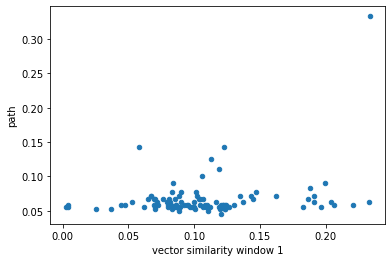

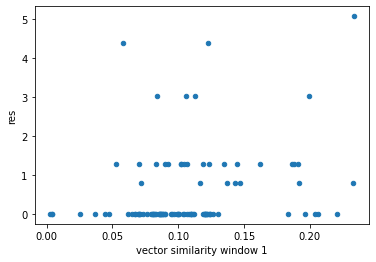

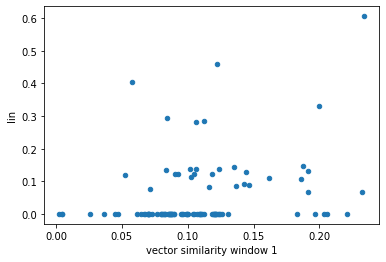

In [ ]:
def draw_scatter(x,y):

    df_window1[x]=df_window1[x].map(float)
    df_window1[y]=df_window1[y].map(float)
    
    df_window1.plot.scatter(x,y)
draw_scatter("vector similarity window 1","path")
draw_scatter("vector similarity window 1","res")
draw_scatter("vector similarity window 1","lin")

In [ ]:
# representations of the 1000 words identified in Q2 with a window size of 5 
vectors_5=word_vectors(wordslist,window=5)

vector_s_5=[]#vector similarity
for i in range(len(wordslist)):
  for j in range(i+1,len(wordslist)):
    vector_s_5.append([wordslist[i],wordslist[j],vectors_5.similarity(wordslist[i],wordslist[j])])

vector_window5=vector_s_5[:100]

df_window5=pd.DataFrame(vector_window5,columns=["wordA","wordB","vector similarity window 5"])

measures=["path","res","lin"]
for measure in measures:
    scores=[]
    for triple in vector_window5:
        scores.append(word_similarity(triple[0],triple[1],measure=measure))
    df_window5[measure]=scores
    
df_window5

,wordA,wordB,vector similarity window 5,path,res,lin
0,in,a,0.560745,0.062500,0.801759,0.066416
1,in,percent,0.379607,0.058824,-0.000000,-0.000000
2,in,it,0.429393,0.055556,-0.000000,-0.000000
3,in,be,0.432709,0.071429,0.801759,0.093246
4,in,pct,0.101083,0.058824,-0.000000,-0.000000
...,...,...,...,...,...,...
95,in,unemployment,0.250199,0.071429,-0.000000,-0.000000
96,in,consumer,0.241839,0.076923,1.290026,0.136191
97,in,cut,0.305913,0.058824,-0.000000,-0.000000
98,in,down,0.291851,0.071429,1.290026,0.114145


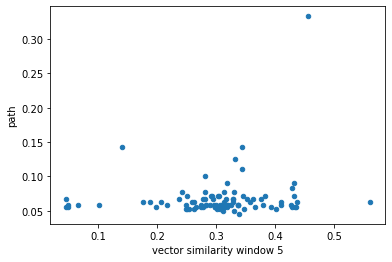

In [ ]:
def draw_scatter(x,y):

    df_window5[x]=df_window5[x].map(float)
    df_window5[y]=df_window5[y].map(float)
    
    df_window5.plot.scatter(x,y)
draw_scatter("vector similarity window 5","path")

In [ ]:
# represntations of the 1000 words identified in Q2 with a window size of 10 
vectors_10=word_vectors(wordslist,window=10)

vector_s_10=[]#vector similarity
for i in range(len(wordslist)):
  for j in range(i+1,len(wordslist)):
    vector_s_10.append([wordslist[i],wordslist[j],vectors_10.similarity(wordslist[i],wordslist[j])])

vector_window10=vector_s_10[:100]

df_window10=pd.DataFrame(vector_window10,columns=["wordA","wordB","vector similarity window 10"])

measures=["path","res","lin"]
for measure in measures:
    scores=[]
    for triple in vector_window10:
        scores.append(word_similarity(triple[0],triple[1],measure=measure))
    df_window10[measure]=scores
   
df_window10

,wordA,wordB,vector similarity window 10,path,res,lin
0,in,a,0.663069,0.062500,0.801759,0.066416
1,in,percent,0.463645,0.058824,-0.000000,-0.000000
2,in,it,0.510127,0.055556,-0.000000,-0.000000
3,in,be,0.515170,0.071429,0.801759,0.093246
4,in,pct,0.111137,0.058824,-0.000000,-0.000000
...,...,...,...,...,...,...
95,in,unemployment,0.296077,0.071429,-0.000000,-0.000000
96,in,consumer,0.280188,0.076923,1.290026,0.136191
97,in,cut,0.356093,0.058824,-0.000000,-0.000000
98,in,down,0.352288,0.071429,1.290026,0.114145


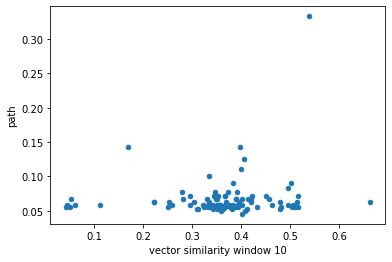

In [ ]:
def draw_scatter(x,y):

    df_window10[x]=df_window10[x].map(float)
    df_window10[y]=df_window10[y].map(float)
    
    df_window10.plot.scatter(x,y)
draw_scatter("vector similarity window 10","path")

In [ ]:
##This code will word count all of the markdown cells in the notebook saved at filepath
##Running it before providing any answers shows that the questions have a word count of 388

import io
from nbformat import current

filepath="/content/drive/My Drive/NLENotebooks/NLEassignment2.ipynb"
question_count=568

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Submission length is 761
